### fit analysis PO4 ###

In [16]:
mmPO4 <- structure( list(S = c(9.997500625, 25, 50, 100, 250, 500, 1000, 1875),
                     v = c(0.0034606481,0.021412037, 0.010648148, 0.045949074, 0.066666667, 0.050347222, 0.107175926, 0.107986111 )),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 8L))

In [17]:
library(drc) # for fitting Michaelis Menten model
library(ggplot2) # for drawing

In [18]:
model.drm <- drm (v ~ S, data = mmPO4, fct = MM.2())

mmlPO4 <- data.frame(S = seq(0, max(mmPO4$S), length.out = 100))
mmlPO4$v <- predict(model.drm, newdata = mmlPO4)

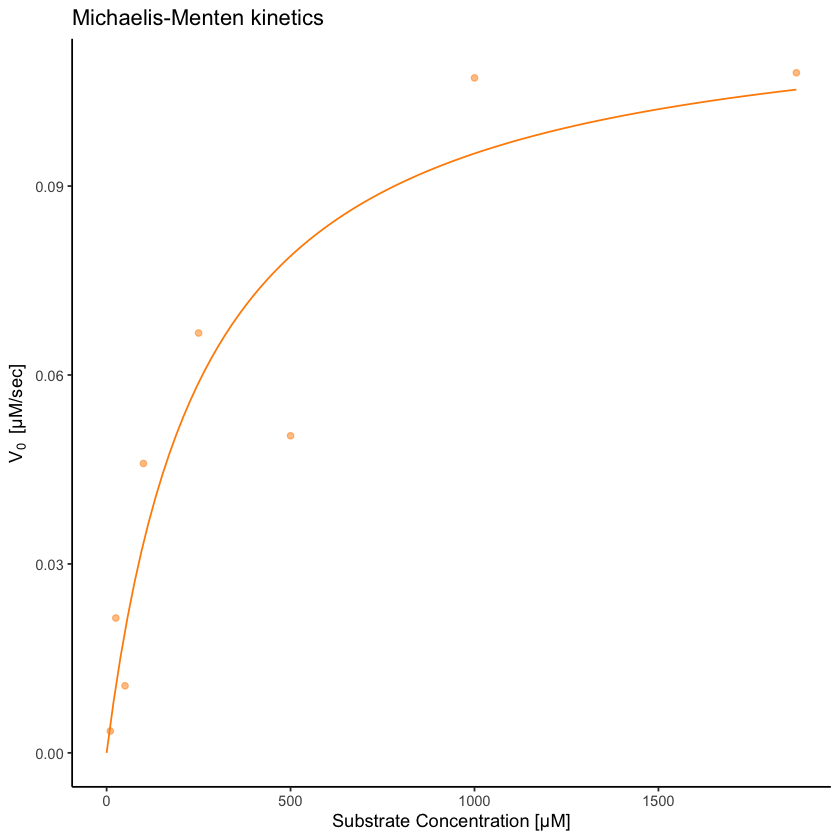

In [19]:
ggplot(mmPO4, aes(x = S, y = v)) +
  theme_classic() +
  xlab("Substrate Concentration [\u03BCM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  #ylab("Speed [dE/sec]") +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5, colour = "dark orange") +
  geom_line(data = mmlPO4, aes(x = S, y = v), colour = " dark orange")

In [20]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mmPO4, 
                 start = list(K = max(mmPO4$v)/2, Vm = max(mmPO4$v)))

In [21]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
K  260.12657  130.66343   1.991 0.093610 .  
Vm   0.11993    0.01901   6.310 0.000739 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01518 on 6 degrees of freedom

Number of iterations to convergence: 12 
Achieved convergence tolerance: 3.244e-06


### Quite a large error!  An eyeball test tells us something is wrong with data point 6. ###
### Let's remove it and do another fit. ###

In [22]:
mmPO4 <- structure( list(S = c(9.997500625, 25, 50, 100, 250, 1000, 1875),
                     v = c(0.0034606481,0.021412037, 0.010648148, 0.045949074, 0.066666667, 0.107175926, 0.107986111 )),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 7L))

In [23]:
model.drm <- drm (v ~ S, data = mmPO4, fct = MM.2())

mmlPO4 <- data.frame(S = seq(0, max(mmPO4$S), length.out = 100))
mmlPO4$v <- predict(model.drm, newdata = mmlPO4)

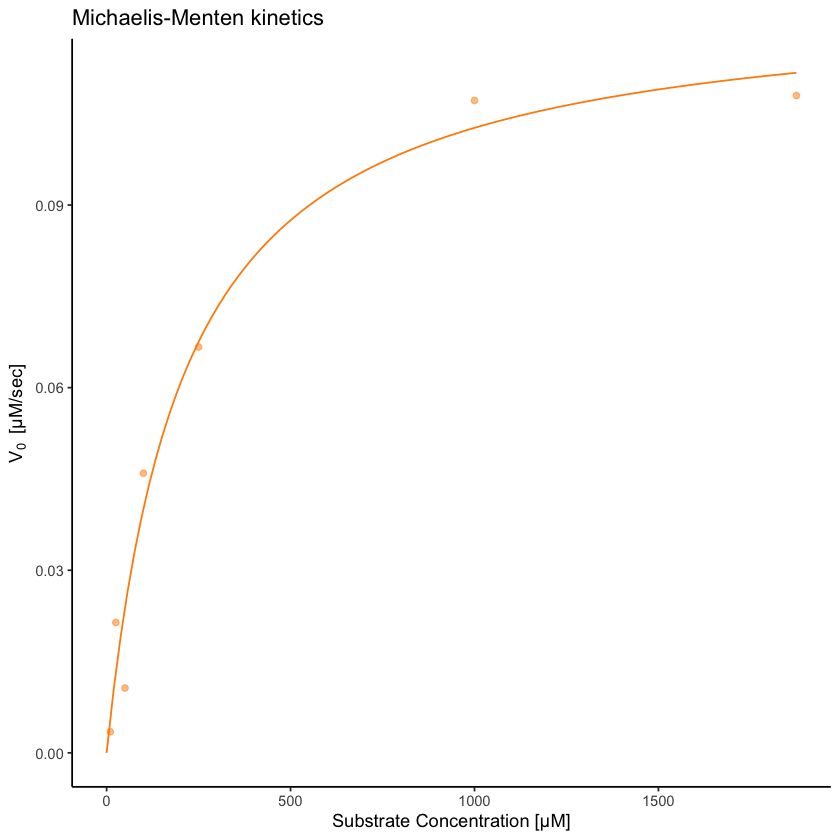

In [24]:
ggplot(mmPO4, aes(x = S, y = v)) +
  theme_classic() +
  xlab("Substrate Concentration [\u03BCM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  #ylab("Speed [dE/sec]") +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5, colour = "dark orange") +
  geom_line(data = mmlPO4, aes(x = S, y = v), colour = " dark orange")

In [25]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mmPO4, 
                 start = list(K = max(mmPO4$v)/2, Vm = max(mmPO4$v)))

In [26]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
K  2.099e+02  5.080e+01   4.133  0.00906 ** 
Vm 1.242e-01  8.977e-03  13.839 3.54e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00796 on 5 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 1.704e-06


Literature value of Km PAP and phosphate from kidney beans 260 +/- 50 microM 
https://www.scielo.br/j/jbchs/a/d559v3b3XvzBQtLXJ9JwZzk/
https://doi.org/10.1590/S0103-50532006000800011
Elliot et al. 2006

### Should I remove poionts to have a better fit? ###
### Yes.  When I'm really confidennt at micropipetting.  Right now, NO.  I'm not there yet, but I did improve over the semester.  I did trials with water and a scale before I did the pipetting whenever I could. ###